**Сравнение численных методов для решения дифференциальных уравнений при 
моделировании ХТП**

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import pandas as pd

Дифференциальное уравнение: $y' = -5ty$

In [2]:
def function(t, y):
    return -5.0 * y * t

Начальные условия: $y(0)=1$, при  $t∈(0;1)$

In [3]:
y0 = 1
t0 = 0

**Метод Эйлера**

$y_{i+1} = y_i + h * function(t_i, y_i)$

In [4]:
# n - кол-во итераций, h - шаг, (t, y0) - начальная точка
def Euler(n, h, t, y0):
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * function(t, y[i])
        t += h
    return y

**Метод Рунге-Кутта 2-го порядка**

$y_{i+1} = y_i + \frac{h}{2}[function(t_i, y_i) + function(t_i + h, y_i + h * function(t_i, y_i))]$

In [5]:
def RungeKuttaSecond(n, h, t, y0):
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + (h/2) * (function(t,y[i])+function(t + h, y[i] + h * function(t,y[i])))
        t += h
    return y

**Метод Рунге-Кутта 4-го порядка**

$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

$k_1 = function(t_i, y_i)$

$k_2 = function(t_i + \frac{h}{2}, y_i + \frac{hk_1}{2})$

$k_3 = function(t_i + \frac{h}{2}, y_i + \frac{hk_2}{2})$

$k_4 = function(t_i + h, y_i + hk_3)$

In [6]:
def RungeKuttaFourth(n, h, t, y0):
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        k1 = function(t,y[i])
        k2 = function(t + h/2, y[i] + h*k1/2)
        k3 = function(t + h/2, y[i] + h*k2/2)
        k4 = function(t + h, y[i] + h*k3)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        t += h
    return y

**Аналитическое решение**

$y_i = \exp(\frac{-5t_i^2}{2})$

In [7]:
def Analytic (n, t):
    yAnalytic = np.zeros(n+1)
    for i in range(n+1):
        yAnalytic[i] = np.exp(-5 * ((t[i] ** 2) / 2))
    return yAnalytic

In [8]:
dT = widgets.BoundedFloatText(min=0,
                              max=1.0,
                              step=0.001,
                              description='Δt:',
                              disabled=False)
butCalculate = widgets.Button(description="Расчёт",
                              button_style='success',
                              disabled=False)

BoundedFloatText(value=0.1, description='Δt:', max=1.0, step=0.001)

Button(button_style='success', description='Расчёт', style=ButtonStyle())

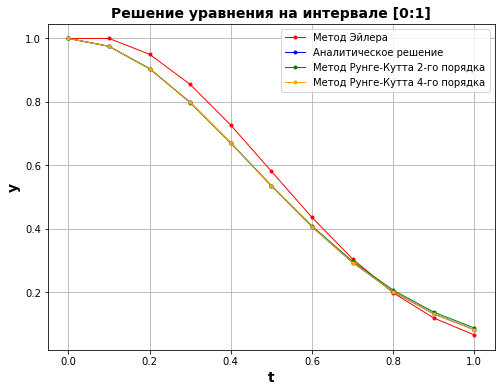

In [9]:
display(dT)
display(butCalculate)

dfError = pd.DataFrame({
        "Δt": pd.Series(dtype='float64'),
        "Метод Эйлера": pd.Series(dtype='float64'),
        "Аналитическое решение": pd.Series(dtype='float64'),
        "Метод Рунге-Кутта 2-го порядка":pd.Series(dtype='float64'),
        "Метод Рунге-Кутта 4-го порядка":pd.Series(dtype='float64'),
        "σ(Эйлер), %": pd.Series(dtype='float64'),
        "σ(Рунге-Кутта 2-го порядка), %": pd.Series(dtype='float64'),
        "σ(Рунге-Кутта 4-го порядка), %": pd.Series(dtype='float64'),
    })

def on_button_clicked(event):
    global dfCompare
    
    clear_output()
    
    display(dT)
    display(butCalculate)
    
    #Δt
    deltaT = dT.value

    # кол-во итераций
    steps = int(1 / deltaT)

    time = np.linspace(t0, 1, steps + 1)

    yEuler = Euler(steps, deltaT, t0, y0)
    yRungeKuttaSecond = RungeKuttaSecond(steps, deltaT, t0, y0)
    yRungeKuttaFourth = RungeKuttaFourth(steps, deltaT, t0, y0)
    yAnalitic = Analytic(steps, time)
    
    dfCompare = pd.DataFrame({
        "Δt": pd.Series(time),
        "Метод Эйлера": pd.Series(yEuler),
        "Аналитическое решение": pd.Series(yAnalitic),
        "Метод Рунге-Кутта 2-го порядка":pd.Series(yRungeKuttaSecond),
        "Метод Рунге-Кутта 4-го порядка":pd.Series(yRungeKuttaFourth),
        
    })
    
    dfError.loc[len(dfError.index)] = [dfCompare['Δt'][1],
                                       dfCompare['Метод Эйлера'][steps],
                                       dfCompare['Аналитическое решение'][steps],
                                       dfCompare['Метод Рунге-Кутта 2-го порядка'][steps],
                                       dfCompare['Метод Рунге-Кутта 4-го порядка'][steps],
                                       np.abs((1-(dfCompare['Метод Эйлера'][steps] /
                                                  dfCompare['Аналитическое решение'][steps])) * 100),
                                       np.abs((1-(dfCompare['Метод Рунге-Кутта 2-го порядка'][steps] /
                                                  dfCompare['Аналитическое решение'][steps])) * 100),
                                       np.abs((1-(dfCompare['Метод Рунге-Кутта 4-го порядка'][steps] /
                                                  dfCompare['Аналитическое решение'][steps])) * 100)]
                                        
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # график
    ax.grid()  # сетка
    #  Добавляем подписи к осям:
    ax.set_title('Решение уравнения на интервале [0:1]',
                 fontsize=14,
                 fontweight='bold')
    ax.set_xlabel('t',
                  fontsize=14,
                  fontweight='bold')
    ax.set_ylabel('y',
                  fontsize=14,
                  fontweight='bold')
    ax.plot(dfCompare['Δt'].values,
            dfCompare['Метод Эйлера'].values,
            ".-",
            lw=1,
            color='red',
            label='Метод Эйлера')  
    ax.plot(dfCompare['Δt'].values,
            dfCompare['Аналитическое решение'].values,
            ".-",
            lw=1,
            color='blue',
            label='Аналитическое решение',)  
    ax.plot(dfCompare['Δt'].values,
            dfCompare['Метод Рунге-Кутта 2-го порядка'].values,
            ".-",
            lw=1,
            color='green',
            label='Метод Рунге-Кутта 2-го порядка',)  
    ax.plot(dfCompare['Δt'].values,
            dfCompare['Метод Рунге-Кутта 4-го порядка'].values,
            ".-",
            lw=1,
            color='orange',
            label='Метод Рунге-Кутта 4-го порядка',) 
    plt.legend()
    plt.show()
    
butCalculate.on_click(on_button_clicked)



In [11]:
from IPython.display import display_html

dfError2 = dfError.copy(deep=True)
dfError2.set_index('Δt', inplace=True)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
display_side_by_side(dfError2.sort_index(), dfCompare)

Метод Эйлера 
 Аналитическое решение 
 Метод Рунге-Кутта 2-го порядка 
 Метод Рунге-Кутта 4-го порядка 
 σ(Эйлер), % 
 σ(Рунге-Кутта 2-го порядка), % 
 σ(Рунге-Кутта 4-го порядка), % 
 
 
 Δt 
 
 
 
 
 
 
 
 
 
 
 
 0.0001 
 0.082071 
 0.082085 
 0.082085 
 0.082085 
 0.016669 
 0.000005 
 1.951772e-11 
 
 
 0.0010 
 0.081948 
 0.082085 
 0.082085 
 0.082085 
 0.166945 
 0.000522 
 4.352518e-10 
 
 
 0.0020 
 0.081810 
 0.082085 
 0.082087 
 0.082085 
 0.334450 
 0.002093 
 6.987078e-09 
 
 
 0.0100 
 0.080694 
 0.082085 
 0.082129 
 0.082085 
 1.695090 
 0.053363 
 4.475131e-06 
 
 
 0.0200 
 0.079253 
 0.082085 
 0.082265 
 0.082085 
 3.449714 
 0.218813 
 7.380876e-05 
 
 
 0.1000 
 0.065473 
 0.082085 
 0.087652 
 0.082133 
 20.237670 
 6.782039 
 5.818799e-02 
 
 
 0.2000 
 0.038400 
 0.082085 
 0.111488 
 0.083070 
 53.219223 
 35.820676 
 1.199538e+00 
 
 
 
 
 
 
 Δt 
 Метод Эйлера 
 Аналитическое решение 
 Метод Рунге-Кутта 2-го порядка 
 Метод Рунге-Кутта 4-го порядка 
 
 
 
 
 0 
 0.0 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 1 
 0.1 
 1.000000 
 0.975310 
 0.975000 
 0.975310 
 
 
 2 
 0.2 
 0.950000 
 0.904837 
 0.904312 
 0.904837 
 
 
 3 
 0.3 
 0.855000 
 0.798516 
 0.798056 
 0.798516 
 
 
 4 
 0.4 
 0.726750 
 0.670320 
 0.670367 
 0.670320 
 
 
 5 
 0.5 
 0.581400 
 0.535261 
 0.536293 
 0.535264 
 
 
 6 
 0.6 
 0.436050 
 0.406570 
 0.408924 
 0.406577 
 
 
 7 
 0.7 
 0.305235 
 0.293758 
 0.297492 
 0.293774 
 
 
 8 
 0.8 
 0.198403 
 0.201897 
 0.206757 
 0.201923 
 
 
 9 
 0.9 
 0.119042 
 0.131994 
 0.137493 
 0.132032 
 
 
 10 
 1.0 
 0.065473 
 0.082085 
 0.087652 
 0.082133

**Вывод**

С уменьшением шага приращения *Δt* уменьшается *величина относительной погрешности*, а значит, повышается *точность расчета*.

В методе Эйлера при уменьшение значение *Δt* в 10 раз (0.01 → 0.001) значение *относительной погрешности* уменьшается также ~ в 10 раз     <br/> (1.695090 % → 0.166945 %). <br/> При изменение (0.01 → 0.0001) ~ в 100 раз (1.695090 % → 0.016669 %). То есть размер шага и ошибка для метода Эйлера связаны линейно.

Исходя из таблицы относительной погрешности, можно сделать вывод, что наиболее точным методом является *метод Рунге-Кутта 4-го порядка*.
<br/> Из таблицы видно, что метод Рунге-Кутты 2-го порядка обладает 2 порядком точности $(O(h^2))$, при уменьшении шага в 10 раз, результат улучшается в 100 раз. Метод Рунге-Кутты 4-го порядка - 4 порядком точности $(O(h^4))$, при уменьшении шага в 10 раз, результат улучшается в 10000 раз.

Для грубого расчета вычисления можно производить методом Эйлера, для точного расчета — методом Рунге-Кутты.